기초부터 시작하는 NLP: 문자-단위 RNN으로 이름 분류하기

출처 : https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']
Slusarski


In [7]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [8]:
n_letters

57

In [4]:
category_lines

{'Czech': ['Abl',
  'Adsit',
  'Ajdrna',
  'Alt',
  'Antonowitsch',
  'Antonowitz',
  'Bacon',
  'Ballalatak',
  'Ballaltick',
  'Bartonova',
  'Bastl',
  'Baroch',
  'Benesch',
  'Betlach',
  'Biganska',
  'Bilek',
  'Blahut',
  'Blazek',
  'Blazek',
  'Blazejovsky',
  'Blecha',
  'Bleskan',
  'Blober',
  'Bock',
  'Bohac',
  'Bohunovsky',
  'Bolcar',
  'Borovka',
  'Borovski',
  'Borowski',
  'Borovsky',
  'Brabbery',
  'Brezovjak',
  'Brousil',
  'Bruckner',
  'Buchta',
  'Cablikova',
  'Camfrlova',
  'Cap',
  'Cerda',
  'Cermak',
  'Chermak',
  'Cermak',
  'Cernochova',
  'Cernohous',
  'Cerny',
  'Cerney',
  'Cerny',
  'Cerv',
  'Cervenka',
  'Chalupka',
  'Charlott',
  'Chemlik',
  'Chicken',
  'Chilar',
  'Chromy',
  'Cihak',
  'Clineburg',
  'Klineberg',
  'Cober',
  'Colling',
  'Cvacek',
  'Czabal',
  'Damell',
  'Demall',
  'Dehmel',
  'Dana',
  'Dejmal',
  'Dempko',
  'Demko',
  'Dinko',
  'Divoky',
  'Dolejsi',
  'Dolezal',
  'Doljs',
  'Dopita',
  'Drassal',
  'Driml',
  

In [5]:
all_categories

['Czech',
 'German',
 'Arabic',
 'Japanese',
 'Chinese',
 'Vietnamese',
 'Russian',
 'French',
 'Irish',
 'English',
 'Spanish',
 'Greek',
 'Italian',
 'Portuguese',
 'Scottish',
 'Dutch',
 'Korean',
 'Polish']

In [3]:
n_categories

18

In [9]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [10]:
# 이름들을 Tensor로 전환
'''
.. NOTE::
역자 주:  One-Hot 벡터는 언어를 다룰 때 자주 이용되며,
단어,글자 등을 벡터로 표현 할 때 단어,글자 사이의 상관 관계를 미리 알 수 없을 경우,
One-Hot으로 표현하여 서로 직교한다고 가정하고 학습을 시작합니다.
동일하게 상관 관계를 알 수 없는 다른 데이터의 경우에도 One-Hot 벡터를 활용 할 수 있습니다.
'''

import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [11]:
# network

import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)


In [12]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [13]:
# 효율성을 위해서 매 단계마다 새로운 Tensor를 만들고 싶지 않기 때문에 letterToTensor 대신 lineToTensor 를 잘라서 사용할 것입니다. 이것은 Tensor의 사전 연산(pre-computing) 배치에 의해 더욱 최적화 될 수 있습니다.

input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8978, -2.9375, -2.8715, -2.8433, -2.8553, -2.8910, -2.8437, -2.9003,
         -2.8341, -2.9409, -2.9372, -2.9315, -2.8924, -2.8844, -2.9686, -2.9095,
         -2.8693, -2.8326]], grad_fn=<LogSoftmaxBackward>)


In [14]:
# Tensor.topk : 최대값부터 k개 
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Polish', 17)


In [15]:
# 학습 예시를 위해 하나의 이름 랜덤 추출 함수 
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Vietnamese / line = To
category = Russian / line = Zhevlakov
category = German / line = Gerhard
category = Russian / line = Zhemchujnikov
category = Scottish / line = Ramsay
category = Polish / line = Jaskulski
category = French / line = Marion
category = Japanese / line = Akaike
category = Polish / line = Mencher
category = Japanese / line = Arakawa


In [16]:
# RNN 마지막 계층이 nn.LogSoftmax이므로 NLLLoss사용 
criterion = nn.NLLLoss()

In [17]:
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [18]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 2.1972 Lieu / Chinese ✗ (Vietnamese)
10000 10% (0m 10s) 1.4814 Bui / Chinese ✗ (Vietnamese)
15000 15% (0m 15s) 1.6723 Siew / Chinese ✓
20000 20% (0m 20s) 1.4717 Chi / Chinese ✗ (Korean)
25000 25% (0m 26s) 1.5491 Gauk / Korean ✗ (Chinese)
30000 30% (0m 31s) 0.4648 Kinugasa / Japanese ✓
35000 35% (0m 36s) 2.3588 Silva / Spanish ✗ (Portuguese)
40000 40% (0m 41s) 1.5585 Gorman / Irish ✓
45000 45% (0m 47s) 0.6145 Maroun / Arabic ✓
50000 50% (0m 52s) 1.3890 Kong / Chinese ✓
55000 55% (0m 58s) 0.9476 Luo / Vietnamese ✗ (Chinese)
60000 60% (1m 3s) 2.2331 Haanraads / Greek ✗ (Dutch)
65000 65% (1m 9s) 1.0680 Medeiros / Portuguese ✓
70000 70% (1m 15s) 2.0980 Armistead / Dutch ✗ (French)
75000 75% (1m 20s) 0.7929 Naser / Arabic ✓
80000 80% (1m 26s) 0.8327 Gallchobhar / Irish ✓
85000 85% (1m 31s) 1.4550 Ruiz / Korean ✗ (Spanish)
90000 90% (1m 36s) 0.0490 Mantovani / Italian ✓
95000 95% (1m 41s) 0.7895 Holodkovsky / Russian ✓
100000 100% (1m 46s) 0.1824 Koutsoubos / Greek ✓


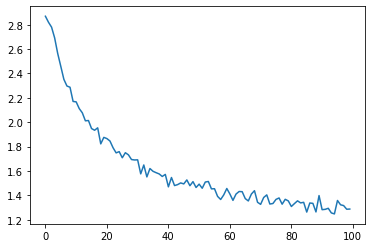

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

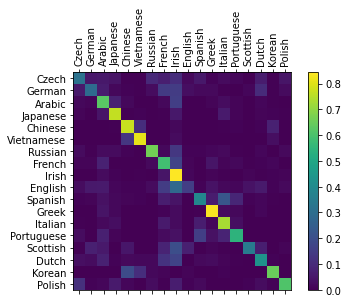

In [20]:
# evaluation
# confusion matrix

confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()


In [21]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Jung')


> Dovesky
(-0.28) Russian
(-1.78) Czech
(-3.77) English

> Jackson
(-1.00) English
(-1.02) Scottish
(-2.37) Czech

> Satoshi
(-0.99) Italian
(-1.64) Japanese
(-1.71) Arabic

> Jung
(-0.48) Chinese
(-1.27) Korean
(-3.62) Vietnamese
